In [113]:
import pandas as pd
import sqlite3
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
orders = pd.read_csv(r"C:\Users\piyus\Downloads\orders.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [7]:
users = pd.read_json(r"C:\Users\piyus\Downloads\users.json")
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [9]:
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

with open(r"C:\Users\piyus\Downloads\restaurants.sql", "r") as f:
    cursor.executescript(f.read())

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [10]:
# merge all 3 in final df
orders = orders.rename(columns={"restaurant_name": "order_restaurant_name"})

final_df = (
    orders
    .merge(users, on="user_id", how="left")
    .merge(restaurants, on="restaurant_id", how="left")
)

final_df = final_df[
    [
        "order_id",
        "user_id",
        "restaurant_id",
        "order_date",
        "total_amount",
        "order_restaurant_name",
        "name",
        "city",
        "membership",
        "restaurant_name",
        "cuisine",
        "rating"
    ]
]

final_df.to_csv("final_food_delivery_dataset.csv", index=False)
final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,order_restaurant_name,name,city,membership,restaurant_name,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [12]:
df = pd.read_csv("final_food_delivery_dataset.csv")


In [13]:
len(df) == len(orders)
df.isnull().sum()
df.dtypes


order_id                   int64
user_id                    int64
restaurant_id              int64
order_date                object
total_amount             float64
order_restaurant_name     object
name                      object
city                      object
membership                object
restaurant_name           object
cuisine                   object
rating                   float64
dtype: object

In [115]:
# Check for duplicates and outliers
print(f"Total Duplicate Rows: {df.duplicated().sum()}")

outliers = df[(df['total_amount'] < lower_bound) | (df['total_amount'] > upper_bound)]
print(f"Number of Outliers detected (Standard IQR): {len(outliers)}")


Total Duplicate Rows: 0
Number of Outliers detected (Standard IQR): 0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               10000 non-null  int64         
 1   user_id                10000 non-null  int64         
 2   restaurant_id          10000 non-null  int64         
 3   order_date             10000 non-null  datetime64[ns]
 4   total_amount           10000 non-null  float64       
 5   order_restaurant_name  10000 non-null  object        
 6   name                   10000 non-null  object        
 7   city                   10000 non-null  object        
 8   membership             10000 non-null  object        
 9   restaurant_name        10000 non-null  object        
 10  cuisine                10000 non-null  object        
 11  rating                 10000 non-null  float64       
 12  rating_range           10000 non-null  category      
 13  qu

In [101]:
df.shape

(10000, 14)

In [104]:
df.describe()

,order_id,user_id,restaurant_id,order_date,total_amount,rating
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,2023-07-02 11:45:53.280000,801.162412,4.045430
min,1.00000,1.000000,1.000000,2023-01-01 00:00:00,100.200000,3.000000
25%,2500.75000,761.000000,127.000000,2023-04-01 00:00:00,446.310000,3.500000
50%,5000.50000,1508.000000,251.000000,2023-07-03 00:00:00,806.295000,4.100000
75%,7500.25000,2250.250000,376.000000,2023-10-02 00:00:00,1149.227500,4.600000
max,10000.00000,3000.000000,500.000000,2024-01-01 00:00:00,1499.830000,5.000000
std,2886.89568,861.727776,144.622558,NaN,405.458753,0.606531


In [20]:
df["order_date"] = pd.to_datetime(df["order_date"])
df.groupby(df["order_date"].dt.month)["order_id"].count()

order_date
1     831
2     785
3     903
4     812
5     844
6     784
7     859
8     851
9     812
10    863
11    807
12    849
Name: order_id, dtype: int64

In [19]:
df["order_date"].dt.strftime("%d-%m-%Y").head()


0    18-02-2023
1    18-01-2023
2    15-07-2023
3    04-10-2023
4    25-12-2023
Name: order_date, dtype: object

In [21]:
# member types
df.groupby("membership")["total_amount"].agg(["count", "mean", "sum"])


,count,mean,sum
membership,,,
Gold,4987,797.145556,3975364.89
Regular,5013,805.158434,4036259.23


In [22]:
# grouping on total amount
df.groupby("city")["total_amount"].sum().sort_values(ascending=False)


city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [23]:
df.groupby("city")["total_amount"].sum().sort_values(ascending=True)


city
Hyderabad    1889366.58
Pune         1924797.93
Chennai      1990513.03
Bangalore    2206946.58
Name: total_amount, dtype: float64

In [24]:
# cuisines
df.groupby("cuisine")["total_amount"].mean()


cuisine
Chinese    798.389020
Indian     798.466011
Italian    799.448578
Mexican    808.021344
Name: total_amount, dtype: float64

In [25]:
df.groupby("rating")["order_id"].count()


rating
3.0    331
3.1    548
3.2    599
3.3    367
3.4    438
3.5    396
3.6    312
3.7    466
3.8    562
3.9    387
4.0    391
4.1    486
4.2    512
4.3    409
4.4    422
4.5    602
4.6    605
4.7    518
4.8    831
4.9    608
5.0    210
Name: order_id, dtype: int64

In [26]:
# Sum total amount per user
user_spend = df.groupby("user_id")["total_amount"].sum()
user_spend[user_spend > 1000].count()


np.int64(2544)

In [119]:
# restaurant rating range generating the highest total revenue
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
df["rating_range"] = pd.cut(
    df["rating"],
    bins=[0,3.5,4.0,4.5,5.0],
    labels=["3.0–3.5","3.6–4.0","4.1–4.5","4.6–5.0"]
)

df.groupby("rating_range")["total_amount"].sum().sort_values(ascending=False)


rating_range
4.6–5.0    2197030.75
3.0–3.5    2136772.70
4.1–4.5    1960326.26
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

In [117]:
# gold member's highest AOV
df[df["membership"]=="Gold"] \
  .groupby("city")["total_amount"] \
  .mean() \
  .sort_values(ascending=False)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [31]:
# lowest number of distinct restaurants but still contributes significant revenue
restaurant_count = df.groupby("cuisine")["restaurant_name"].nunique()
revenue = df.groupby("cuisine")["total_amount"].sum()

pd.concat([restaurant_count, revenue], axis=1) \
  .rename(columns={"restaurant_name":"restaurant_count"}) \
  .sort_values("restaurant_count")


,restaurant_count,total_amount
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [32]:
# total orders placed by Gold members
round(
    (df[df["membership"]=="Gold"].shape[0] / df.shape[0]) * 100
)


50

In [33]:
# highest average order value but less than 20 total orders
stats = df.groupby("order_restaurant_name") \
          .agg(
              avg_order=("total_amount","mean"),
              order_count=("order_id","count")
          )

stats[stats["order_count"] < 20] \
     .sort_values("avg_order", ascending=False)


,avg_order,order_count
order_restaurant_name,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19
...,...,...
Annapurna Tiffins Punjabi,621.828947,19
Darbar Tiffins Non-Veg,596.815556,18
Darbar Restaurant Punjabi,589.972857,14


In [92]:
options = [
    'Grand Cafe Punjabi', 
    'Grand Restaurant South Indian', 
    'Ruchi Mess Multicuisine', 
    'Ruchi Foods Chinese'
]
# filter
final_check = stats[stats.index.isin(options)].sort_values("avg_order", ascending=False)
print(final_check)

                                avg_order  order_count
order_restaurant_name                                 
Ruchi Mess Multicuisine        851.226250           40
Grand Restaurant South Indian  842.567586           29
Grand Cafe Punjabi             765.409063           32
Ruchi Foods Chinese            686.603158           19


In [34]:
# highest revenue combination
df.groupby(["membership","cuisine"])["total_amount"] \
  .sum() \
  .sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [35]:
# total revenue highest quarter 
df["quarter"] = df["order_date"].dt.to_period("Q")

df.groupby("quarter")["total_amount"].sum().sort_values(ascending=False)


quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

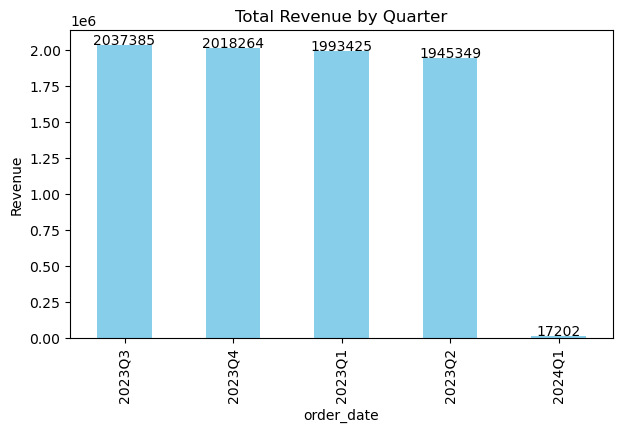

In [93]:
rev = df.groupby(df["order_date"].dt.to_period("Q"))["total_amount"].sum().sort_values(ascending=False)
ax = rev.plot(kind="bar", figsize=(7,4), color="skyblue", title="Total Revenue by Quarter")
for i, v in enumerate(rev): ax.text(i, v+1000, f"{v:.0f}", ha='center')
plt.ylabel("Revenue"); plt.show()

In [36]:
# tot order from gold
df[df["membership"]=="Gold"].shape[0]


4987

In [37]:
# total revenue in hyderabad
round(df[df["city"]=="Hyderabad"]["total_amount"].sum())


1889367

In [38]:
# distinct user placed atleast one order
df["user_id"].nunique()


2883

In [39]:
# aov for gold members
round(df[df["membership"]=="Gold"]["total_amount"].mean(), 2)


np.float64(797.15)

In [40]:
# rating ≥ 4.5
df[df["rating"] >= 4.5].shape[0]


3374

In [41]:
# orders placed in the top revenue city among Gold members only
top_city = (
    df[df["membership"]=="Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .idxmax()
)

df[(df["membership"]=="Gold") & (df["city"]==top_city)].shape[0]


1337

In [43]:
# Returns all rows where the user_id has appeared before(multiple)
duplicates = df[df.duplicated(subset=['user_id'], keep=False)]

duplicates.sort_values(by='user_id').head(10)

,order_id,user_id,restaurant_id,order_date,total_amount,order_restaurant_name,name,city,membership,restaurant_name,cuisine,rating,rating_range,quarter
1891,1892,2,245,2023-06-06,141.17,Classic Biryani North Indian,User_2,Pune,Gold,Restaurant_245,Mexican,3.5,3.0–3.5,2023Q2
8579,8580,2,358,2023-02-02,796.35,Udupi Cafe North Indian,User_2,Pune,Gold,Restaurant_358,Indian,5.0,4.6–5.0,2023Q1
5720,5721,2,127,2023-07-07,921.37,Hotel Eatery Family Restaurant,User_2,Pune,Gold,Restaurant_127,Chinese,5.0,4.6–5.0,2023Q3
384,385,2,121,2023-03-04,1082.71,Sri Delights Non-Veg,User_2,Pune,Gold,Restaurant_121,Indian,4.1,4.1–4.5,2023Q1
7794,7795,2,71,2023-01-03,957.85,New Dhaba Non-Veg,User_2,Pune,Gold,Restaurant_71,Indian,3.7,3.6–4.0,2023Q1
1543,1544,2,252,2023-08-03,529.90,New Eatery South Indian,User_2,Pune,Gold,Restaurant_252,Indian,3.7,3.6–4.0,2023Q3
7176,7177,2,93,2023-11-13,670.67,Swagath Cafe Multicuisine,User_2,Pune,Gold,Restaurant_93,Chinese,4.9,4.6–5.0,2023Q4
1682,1683,2,333,2023-12-05,505.71,Amma Mess Multicuisine,User_2,Pune,Gold,Restaurant_333,Chinese,3.1,3.0–3.5,2023Q4
1696,1697,2,289,2023-07-07,588.06,Sri Biryani Punjabi,User_2,Pune,Gold,Restaurant_289,Italian,4.8,4.6–5.0,2023Q3
8894,8895,2,232,2023-11-27,1370.33,New Dhaba Family Restaurant,User_2,Pune,Gold,Restaurant_232,Mexican,4.0,3.6–4.0,2023Q4


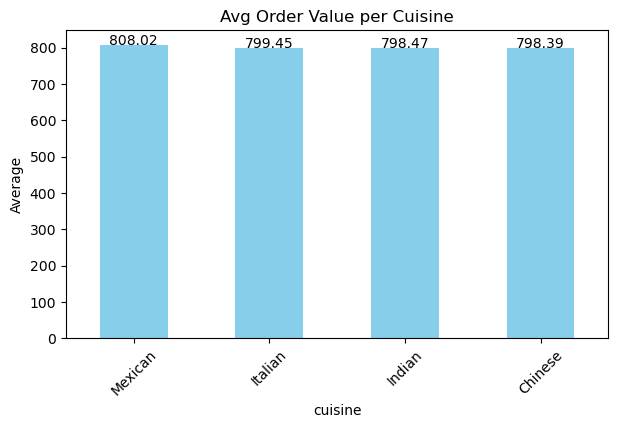

In [49]:
# highest order cuisine
import matplotlib.pyplot as plt
import seaborn as sns

avg_val = df.groupby("cuisine")["total_amount"].mean().sort_values(ascending=False)
ax = avg_val.plot(kind="bar", figsize=(7,4), color="skyblue", rot=45, title="Avg Order Value per Cuisine")
for i, v in enumerate(avg_val): ax.text(i, v+1, f"{v:.2f}", ha='center')
plt.ylabel("Average"); plt.show()


In [47]:
top_cuisine = avg_order_value.idxmax()
print("Cuisine with highest average order value:", top_cuisine)


Cuisine with highest average order value: Mexican


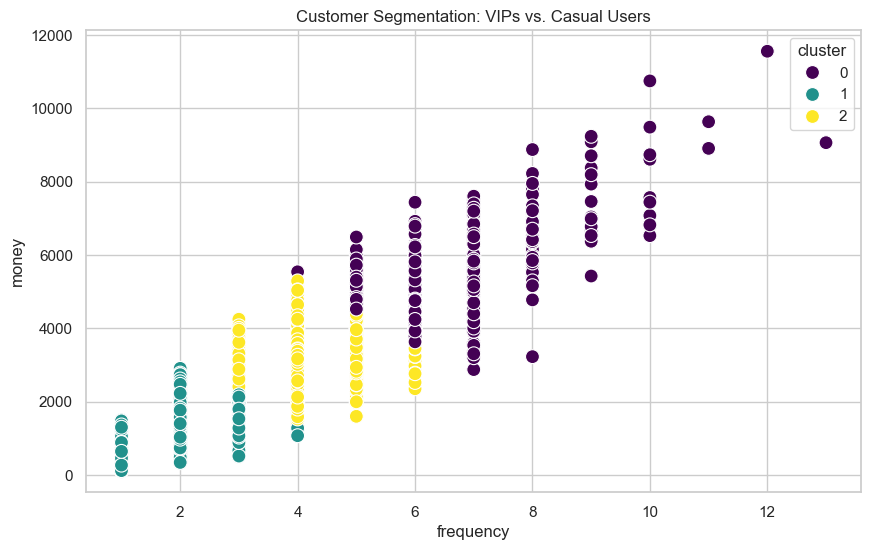

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

user_segments = df.groupby('user_id').agg({
    'order_id': 'count',
    'total_amount': 'sum'
}).rename(columns={'order_id': 'frequency', 'total_amount': 'money'})

# Normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_segments)

# Create 3 Clusters ( VIP, Regular, Low-Value)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_segments['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_segments, x='frequency', y='money', hue='cluster', palette='viridis', s=100)
plt.title('Customer Segmentation: VIPs vs. Casual Users')
plt.show()

In [ ]:
# summary
'''1)High-Value Cuisine:Mexican and Italian cuisines represent a smaller portion of total orders, they consistently deliver the highest Average Order Value (AOV).

2)Bangalore is the primary revenue driver for the platform, significantly outperforming other cities in total spend.

3)Gold members currently account for 50% of total orders. These users show higher spending stability, specifically in Chennai, where they have the highest AOV.'''